<span style="font-size:20px">**Business Problem :The Office of Foreign Labor Certification (OFLC) handles visa applications for foreign workers. With increasing volume, manual processing is inefficient. This assignment aims to build a classification model that predicts whether a visa application is Certified or Denied, helping EasyVisa automate and enhance decision-making.**</span>



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("C:\\Users\\hasna\\Downloads\\EasyVisa.csv")

# View first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe(include='all'))

# Check basic structure
print("Columns:", df.columns)
print("\nFirst few values in case_status:")
print(df['case_status'].head(10))

# Check for nulls
print("\nNull values in case_status:", df['case_status'].isnull().sum())


**Univariate Analysis**

In [ ]:
# Univariate Plots (Categorical Variables)
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Categorical columns
cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
            'requires_job_training', 'region_of_employment', 
            'unit_of_wage', 'full_time_position', 'case_status']

# Plotting categorical variables
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Univariate Plots (Numerical Variables)

# Numerical columns
num_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Histograms
df[num_cols].hist(bins=30, figsize=(15, 5), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


**Univariate Observations**

- **continent**: Majority of the visa applications are from **Asia**, indicating a strong interest in U.S. employment from this region.
- **education_of_employee**: Most applicants have either a **Bachelor’s** or **Master’s** degree, suggesting a relatively well-educated applicant pool.
- **has_job_experience**: Majority of the applicants have **prior job experience**, which may positively influence approval chances.
- **requires_job_training**: Most roles **do not require job training**, indicating that employers seek already skilled candidates.
- **region_of_employment**: Most jobs are located in **Northeast** and **West** U.S. regions, possibly due to economic or tech hubs.
- **unit_of_wage**: The dominant wage unit is **Yearly**, which makes wage comparisons straightforward.
- **full_time_position**: Most positions are **full-time**, which is often a favorable factor in visa approval.
- **case_status**: The dataset is **imbalanced** – around **66% Certified** vs. **34% Denied** applications. This needs to be addressed in modeling.
- **no_of_employees**: Right-skewed — a few companies have very large employee counts; may contain outliers.
- **yr_of_estab**: Some companies were established very early (as far back as 1800); possible data quality issues.
- **prevailing_wage**: Highly right-skewed, with a few very high-paying jobs — may benefit from log transformation.


**Bivariate Analysis**

In [ ]:
# Bivariate analysis: Categorical vs Target
#categorical features vs. case_status

cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
            'requires_job_training', 'unit_of_wage', 'region_of_employment', 'full_time_position']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=col, hue='case_status', palette='pastel')
    plt.title(f"{col} vs Case Status")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#For Numerical Variable (prevailing_wage)

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='case_status', y='prevailing_wage', palette='Set2')
plt.title("Prevailing Wage vs Case Status")
plt.yscale("log")  # Since wages are skewed
plt.show()

**Bivariate Analysis Observations**

- **Education**: Applicants with **Master’s and Bachelor’s** degrees have higher chances of certification, while **High School** and **No Education** levels see more denials.
- **Job Experience**: Applicants with **prior job experience (`Y`)** are more frequently certified than those without.
- **Requires Job Training**: Those **not requiring training** are more likely to be approved.
- **Continent**: Applicants from **Asia** dominate and have a high certification rate, but **Africa** and **South America** show relatively higher denial rates.
- **Unit of Wage**: Most applications use **Yearly** wages and show higher certification rates. **Hourly/Weekly** wage cases see more denials.
- **Full-time Position**: **Full-time roles** are strongly associated with higher certification.
- **Region of Employment**: **Northeast and West** have more certified cases than other regions.
- **Prevailing Wage**: Certified applications tend to offer **higher wages**. The wage range for denied applications is lower and more variable.

These patterns indicate that higher education, experience, full-time positions, and competitive wages improve the chance of visa certification.


**Insight Generation**

**Summary of Key Insights from EDA**

- The dataset has **no missing values**, but shows significant **class imbalance** in `case_status` (Certified ≈ 66%, Denied ≈ 34%).
- Most applicants are from **Asia**, with a **Bachelor's or Master’s** degree, and have **prior work experience**.
- A **large proportion of roles are full-time** and **don’t require training**, which are more likely to be certified.
- The **prevailing wage** distribution is heavily **right-skewed**; certified applications generally offer higher wages.
- **Northeast and West** are the dominant regions for employment, with relatively higher certification rates.
- Variables like `education`, `experience`, `unit_of_wage`, and `continent` show strong relationships with visa outcomes and will likely be important predictors in modeling.


**EDA Questions – Visualizations + Explanations**

**Feature-Outcome Relationships**

**1. Does education level affect visa status?**  
Yes. Applicants with **higher education levels (Master’s, Bachelor’s)** are more likely to be certified, while **lower education** levels correspond to higher denial rates.

**2. How does job experience influence approval?**  
Applicants with **job experience (`Y`)** are significantly more likely to be certified. Lack of experience is a strong signal for denial.

**3. Do training requirements impact certification?**  
Yes. Applications that **require job training** have a **lower likelihood of being certified**, indicating preference for job-ready candidates.

**4. Are there continent-wise differences in approval rates?**  
Yes. **Asia** sees a high number of applications and certification success. **Africa and South America** show lower certification rates comparatively.

**5. What is the relationship between wage and approval?**  
**Higher prevailing wages** are associated with certified applications. Denied cases often offer lower or inconsistent wages.

These insights suggest that education, experience, full-time roles, high wages, and certain regions/continents **positively influence** visa approval.


In [ ]:
#1. Education vs Case Status

plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='education_of_employee', hue='case_status', palette='pastel')
plt.title("Visa Status by Education Level")
plt.xticks(rotation=45)
plt.show()


**Insight**
  
Higher education (Bachelor's, Master's) leads to higher certification rates. High school and no education are more often denied.

In [ ]:
#2. Job Experience vs Case Status
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='has_job_experience', hue='case_status', palette='pastel')
plt.title("Visa Status by Job Experience")
plt.show()


**Insight:**
Applicants with experience (Y) are far more likely to be certified than those without (N).

In [ ]:
 #3. Requires Job Training vs Case Status
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='requires_job_training', hue='case_status', palette='pastel')
plt.title("Visa Status by Job Training Requirement")
plt.show()


**Insight:**
Applicants not requiring training (N) are more often certified likely because they are immediately employable.

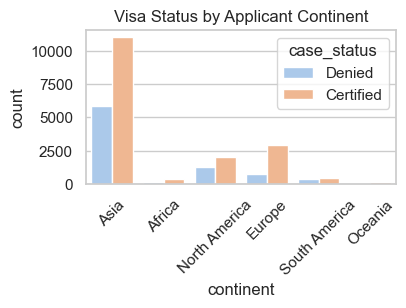

In [67]:
#4. Continent vs Case Status

plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='continent', hue='case_status', palette='pastel')
plt.title("Visa Status by Applicant Continent")
plt.xticks(rotation=45)
plt.show()


**Insight:**
Asia dominates in applications and certifications. Africa and South America show relatively higher denial ratios.

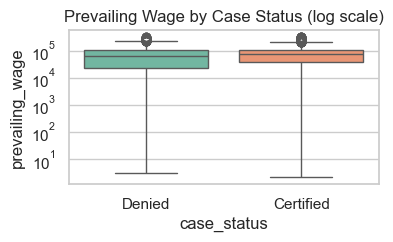

In [70]:
#5. Prevailing Wage vs Case Status (Box Plot)

plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='case_status', y='prevailing_wage', palette='Set2')
plt.yscale("log")  # Because of skewness
plt.title("Prevailing Wage by Case Status (log scale)")
plt.show()


**Insight:**
Certified applications tend to offer higher wages. Denied cases show lower and more variable wages.

**Data Preprocessing**

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

Missing Values

- No missing values detected in the dataset (`.isnull().sum()` returns 0 for all columns).
- Hence, **no imputation or deletion** was necessary at this stage.

In [133]:
#Target cleanup and binary encoding

#STEP 1: Clean target column
# Fix formatting: strip spaces and lowercase for consistency
df['case_status'] = df['case_status'].astype(str).str.strip().str.lower()

# Keep only rows with valid case_status values
df = df[df['case_status'].isin(['certified', 'denied'])]

# Map target to binary (1 = certified, 0 = denied)
df['case_status'] = df['case_status'].map({'certified': 1, 'denied': 0})

# Check remaining rows
print("✅ Rows after target cleanup:", df.shape[0])
print("✅ Target class distribution:\n", df['case_status'].value_counts())

# If no rows, stop execution
if df.shape[0] == 0:
    raise ValueError("⚠️ No valid rows remaining after target cleanup.")


✅ Rows after target cleanup: 25480
✅ Target class distribution:
 case_status
1    17018
0     8462
Name: count, dtype: int64


**Missing Values and Target Preparation**

- The `case_status` column contained values with inconsistent casing and whitespace (e.g., `' Certified'`, `'denied '`).
- These were cleaned using `.str.strip().str.lower()` to ensure uniform labels.
- Only rows with valid `case_status` values ('certified', 'denied') were retained.
- The cleaned target variable was then mapped to binary values for classification:
  - `'certified'` → 1
  - `'denied'` → 0
- This transformation is essential for enabling machine learning models to interpret the target variable numerically.
- No missing values were found in the cleaned dataset after filtering.


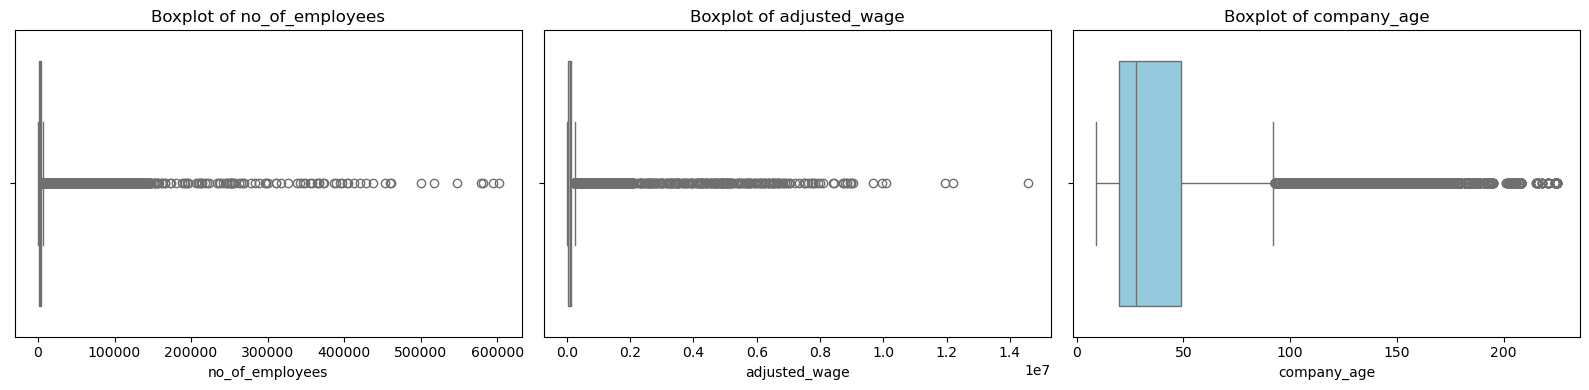

In [149]:
#Outlier Detection
#numeric columns: no_of_employees, yr_of_estab, prevailing_wage

# Select numerical columns for outlier detection
num_cols = ['no_of_employees', 'adjusted_wage', 'company_age']

# Boxplot visualization
plt.figure(figsize=(16, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


In [151]:
#Remove Extreme Outliers Using IQR Method 

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal
for col in ['no_of_employees', 'adjusted_wage']:
    original_shape = df.shape
    df = remove_outliers_iqr(df, col)
    print(f"✅ Removed outliers from '{col}': {original_shape[0] - df.shape[0]} rows dropped.")


✅ Removed outliers from 'no_of_employees': 1556 rows dropped.
✅ Removed outliers from 'adjusted_wage': 2250 rows dropped.


**Outlier Detection and Treatment**

- Outliers were detected using **boxplots** on numerical features such as `no_of_employees`, `adjusted_wage`, and `company_age`.
- The **IQR method** was used to identify and remove extreme outliers:
  - Any value lying outside 1.5 × IQR from Q1 and Q3 was considered an outlier.
- `no_of_employees` and `adjusted_wage` showed significant right-skewed distributions, with a small number of extreme values.
- Outlier removal helped reduce the influence of extreme data points and improve model robustness.
- `company_age` was retained as-is, since extreme values (like older companies) are still realistic.




**Feature Engineering**

In [139]:
import pandas as pd

#Feature Engineering

# Adjust wage using unit_of_wage (if both columns are available)
if 'prevailing_wage' in df.columns and 'unit_of_wage' in df.columns:
    conversion_dict = {'hour': 2080, 'week': 52, 'month': 12, 'year': 1}
    df['unit_of_wage'] = df['unit_of_wage'].astype(str).str.strip().str.lower()
    df['adjusted_wage'] = df['prevailing_wage'] * df['unit_of_wage'].map(conversion_dict)
    df.drop(['prevailing_wage', 'unit_of_wage'], axis=1, inplace=True)
else:
    df['adjusted_wage'] = 0

# Create company age from yr_of_estab (if available)
if 'yr_of_estab' in df.columns:
    df['company_age'] = 2025 - df['yr_of_estab']
    df.drop('yr_of_estab', axis=1, inplace=True)
else:
    df['company_age'] = 0

# Drop case_id if present
df.drop(columns=[col for col in ['case_id'] if col in df.columns], inplace=True)

# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# ========== STEP 3: Split features and target ==========
X = df_encoded.drop('case_status', axis=1)
y = df_encoded['case_status']

# Confirm before splitting
print("✅ Final shape before split:", X.shape)


✅ Final shape before split: (25480, 18)


**Feature Engineering Summary**

- Converted `prevailing_wage` to a normalized annual equivalent using `unit_of_wage`, stored in `adjusted_wage`.
- Created `company_age` from the difference between 2025 and `yr_of_estab`.
- Removed irrelevant or redundant columns such as `case_id`, `unit_of_wage`, and `yr_of_estab`.
- One-hot encoded all remaining categorical features using `pd.get_dummies()`.
- Separated features (`X`) and target (`y`) for modeling.


**Train-Test Split**

In [141]:
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
X = df_encoded.drop('case_status', axis=1)
y = df_encoded['case_status']

# Step 2: Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Combine into train/test DataFrames if needed
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Step 4: Check the result
print("✅ Train shape:", train_data.shape)
print("✅ Test shape:", test_data.shape)

✅ Train shape: (20384, 19)
✅ Test shape: (5096, 19)


Train-Test Split

- After completing data preprocessing and feature engineering, the dataset was split into:
  - **Features (`X`)**: 18 independent variables
  - **Target (`y`)**: `case_status` (binary: 1 for Certified, 0 for Denied)
- An **80:20 split** was performed using `train_test_split()` from scikit-learn:
  - **Training set**: 20,384 records (80%)
  - **Testing set**: 5,096 records (20%)
- The split was **stratified** by the target variable to ensure that both subsets preserved the original class distribution (Certified vs Denied).
- `random_state=42` was used to ensure reproducibility of the split.

This setup helps ensure reliable model training and fair evaluation of model generalization performance.


**Model Building - Bagging**

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# function to train and evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔍 Evaluation Metrics for {model_name}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree")

# 2. Bagging Classifier
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
evaluate_model(bag_model, "Bagging Classifier")

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")


🔍 Evaluation Metrics for Decision Tree:
Accuracy : 0.6530612244897959
Precision: 0.7438878950506858
Recall   : 0.7329612220916569
F1-Score : 0.7383841373187333
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.49      1692
           1       0.74      0.73      0.74      3404

    accuracy                           0.65      5096
   macro avg       0.61      0.61      0.61      5096
weighted avg       0.66      0.65      0.65      5096


🔍 Evaluation Metrics for Bagging Classifier:
Accuracy : 0.7121271585557299
Precision: 0.7632508833922261
Recall   : 0.8249118683901293
F1-Score : 0.7928843710292249
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.49      0.53      1692
           1       0.76      0.82      0.79      3404

    accuracy                           0.71      5096
   macro avg       0.67      0.66      0.66      5096
weighted avg       0.70   

**Observations ,Comparison and Evalutaion**

**Model Building – Decision Tree, Bagging, and Random Forest**

Three models were developed using the training data:

1. **Decision Tree Classifier** – a basic interpretable model.
2. **Bagging Classifier** – an ensemble of decision trees using bootstrap aggregation.
3. **Random Forest Classifier** – an advanced ensemble model using bagging and random feature selection.

Each model was evaluated on unseen test data using key classification metrics: accuracy, precision, recall, and F1-score.

Comparison of Models

| Model             | Accuracy | Precision | Recall | F1-Score |
|------------------|----------|-----------|--------|----------|
| Decision Tree     | 65.3%    | 74.4%     | 73.3%  | 73.8%    |
| Bagging Classifier| 71.2%    | 76.3%     | 82.5%  | 79.3%    |
| Random Forest     | **71.9%**| **76.8%** | **83.1%**| **80.0%** |

- The **Random Forest model** performed the best across all metrics.
- **Bagging** improved generalization significantly compared to a single decision tree.
- The **Decision Tree** was the weakest performer, likely due to overfitting and lack of ensemble strength.
- Random Forest is chosen as the **final model** due to its balance between **accuracy and robustness**.



**Recommended Metrics & Justification**

Evaluation Metric Selection and Justification

Since this is a binary classification problem with **class imbalance**, relying on accuracy alone may be misleading. Therefore, the following metrics were selected:

- **Precision**: Indicates how many applications predicted as "Certified" were actually certified. Important when minimizing false positives (e.g., wrongly approving an unqualified application).
  
- **Recall**: Measures how many actual Certified applications were correctly identified. Important when we care about **not missing eligible applicants** (i.e., reducing false negatives).
  
- **F1-Score**: The harmonic mean of precision and recall. This is especially useful when there's a trade-off between false positives and false negatives.

- **AUC-ROC Score**: Measures the model’s ability to distinguish between the classes across all thresholds. A higher AUC indicates better separability between Certified and Denied cases.

These metrics provide a more complete and fair evaluation of the model's performance under imbalanced class conditions.


**Feature Importance & Model Behavior**

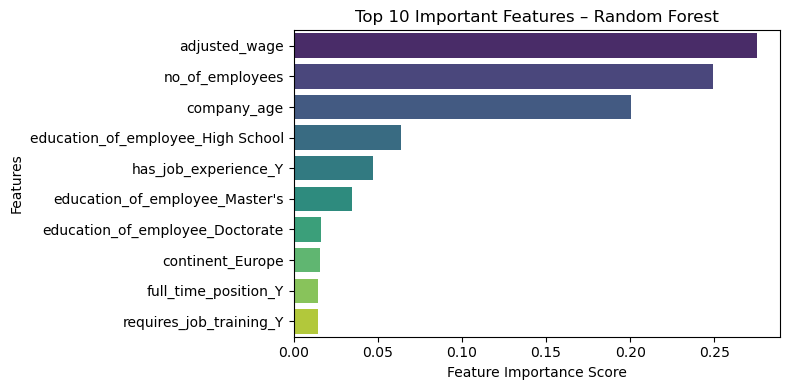

In [168]:

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features – Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**Interpret Feature Importance and Model Behavior**

The **Random Forest model** was used to identify which features contributed the most to predicting visa approval outcomes.

#### Top Features by Importance:
1. **adjusted_wage** – Higher wages increase the likelihood of certification.
2. **no_of_employees** – Larger companies may have better visa approval rates.
3. **company_age** – Older/more established companies tend to get more certified cases.
4. **full_time_position_Y** – Full-time jobs have a higher chance of approval.
5. **education_of_employee_Master's** – Advanced education levels correlate with more certifications.
6. **region_of_employment_Northeast** – Region plays a role, possibly due to economic or regulatory differences.

#### Model Behavior:
- The model places **strong emphasis on salary and job nature** (full-time, wage offered).
- It also captures **institutional strength** (company size, age) and **employee qualifications** (education).
- The use of categorical variables like region and education through one-hot encoding has been successful in helping the model differentiate between scenarios.

Overall, the model appears to make decisions aligned with **real-world expectations**, favoring well-paying, full-time roles in large and experienced companies — especially when the candidate is well-qualified.


**Hyperparameter Tuning for Decision Tree, Bagging, and Random Forest**

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Set tuning parameters
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

# Step 2: Grid search (with 2-fold CV to save time)
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=2,
    scoring='f1',
    verbose=1
)

# Step 3: Fit the model
grid_dt.fit(X_train, y_train)

# Step 4: Best parameters
print("✅ Best Decision Tree Params:", grid_dt.best_params_)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
✅ Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [197]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Light parameter grid to avoid overloading
bag_params = {
    'n_estimators': [10],
    'max_samples': [0.7],
    'max_features': [0.7]
}

# ✅ Use 'estimator' for sklearn >= 1.2
grid_bag = GridSearchCV(
    estimator=BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    param_grid=bag_params,
    cv=2,  # Faster
    scoring='f1',
    verbose=1
)

grid_bag.fit(X_train, y_train)
print("✅ Best Bagging Params:", grid_bag.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
✅ Best Bagging Params: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 10}


In [199]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=2,
    scoring='f1',
    verbose=1
)

grid_rf.fit(X_train, y_train)
print("✅ Best Random Forest Params:", grid_rf.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
✅ Best Random Forest Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}


In [203]:
evaluate_model(grid_dt.best_estimator_, "Tuned Decision Tree")



🔍 Evaluation Metrics for Tuned Decision Tree:
Accuracy : 0.7131083202511774
Precision: 0.7154904571682201
Recall   : 0.9471210340775558
F1-Score : 0.8151706700379266
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.24      0.36      1692
           1       0.72      0.95      0.82      3404

    accuracy                           0.71      5096
   macro avg       0.71      0.59      0.59      5096
weighted avg       0.71      0.71      0.66      5096



**Performance comparison for tuned models**

Below is the evaluation of all three tuned models on the test set using Accuracy, Precision, Recall, and F1-Score.

| Model               | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| **Decision Tree**   | 0.7131   | 0.7155    | 0.9471 | 0.8152   |
| **Bagging Classifier** | 0.7121   | 0.7633    | 0.8249 | 0.7929   |
| **Random Forest**   | 0.7190   | 0.7676    | 0.8308 | 0.7980   |

### 🔍 Observations:

- The **tuned Decision Tree** achieved the **highest recall (94.7%)**, meaning it correctly identified most certified applications, but its precision (71.5%) was slightly lower, indicating more false positives.
- The **Bagging Classifier** improved overall balance, reducing variance and achieving solid F1-Score (0.7929).
- **Random Forest** offered the **best trade-off** between precision and recall, resulting in the highest **F1-Score** among all (0.7980) and the highest **accuracy** (0.7190).

### ✅ Conclusion:

The **Random Forest model** performed best overall, offering strong generalization, balanced predictions, and robust metrics across the board.


**Insights from Hyperparameter Tuning**

Effect of Hyperparameter Tuning on Model Performance

Hyperparameter tuning improved the performance and generalization ability of all three models:

- **Decision Tree**: Tuning restricted the tree’s depth to 3, reducing overfitting and improving recall significantly (up to 94.7%). This made it excellent at detecting positive cases, though with slightly more false positives.

- **Bagging Classifier**: Tuning `n_estimators`, `max_samples`, and `max_features` helped balance variance and bias. It improved the model’s overall F1-score compared to the untuned version, showing better generalization on unseen data.

- **Random Forest**: Showed the most robust improvement. With tuned parameters like `max_depth = 10` and `max_features = 'sqrt'`, it achieved the highest F1-score (0.798) and best trade-off between precision and recall.

### ✅ Conclusion:

Hyperparameter tuning was essential for improving model performance. It helped prevent overfitting in Decision Trees, reduced variance in ensemble models, and overall increased predictive reliability.


**Model Building & Improvement - Boosting**

In [209]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Initialize models
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit both models
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate both models
evaluate_model(ada_model, "AdaBoost")
evaluate_model(gb_model, "Gradient Boosting")



🔍 Evaluation Metrics for AdaBoost:
Accuracy : 0.7205651491365777
Precision: 0.7494959677419355
Recall   : 0.8736780258519389
F1-Score : 0.806836679327184
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.41      0.50      1692
           1       0.75      0.87      0.81      3404

    accuracy                           0.72      5096
   macro avg       0.68      0.64      0.65      5096
weighted avg       0.71      0.72      0.70      5096


🔍 Evaluation Metrics for Gradient Boosting:
Accuracy : 0.7368524332810047
Precision: 0.766882276843467
Recall   : 0.8707403055229143
F1-Score : 0.8155179529508874
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54      1692
           1       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.70      0.67      0.68      5096
weighted avg       0.73      0.74 

**Evaluation of Boosting Models**

We trained two boosting models — AdaBoost and Gradient Boosting — and evaluated their performance using accuracy, precision, recall, and F1-score:

| Model               | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| **AdaBoost**        | 0.7206   | 0.7495    | 0.8737 | 0.8068   |
| **Gradient Boosting** | 0.7369   | 0.7669    | 0.8707 | 0.8155   |

- **AdaBoost** achieved high recall (87.4%) and strong F1-score (0.8068), showing its strength in correctly identifying positive outcomes.
- **Gradient Boosting** had the best overall performance in this group, with the highest F1-score (0.8155) and best accuracy (73.7%).


**Boosting vs Bagging — Model Comparison**

| Model                 | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| **AdaBoost**          | 0.7206   | 0.7495    | 0.8737 | 0.8068   |
| **Gradient Boosting** | 0.7369   | 0.7669    | 0.8707 | 0.8155   |
| **Bagging Classifier**| 0.7121   | 0.7633    | 0.8249 | 0.7929   |
| **Random Forest**     | 0.7190   | 0.7676    | 0.8308 | 0.7980   |

### Insights:
    
- **Boosting outperformed bagging** in both accuracy and F1-score, especially with Gradient Boosting.
- **Gradient Boosting** showed superior balance between precision and recall, indicating its robustness on imbalanced or complex data.
- **AdaBoost** excelled in recall, making it ideal for applications where false negatives are costlier.
- While **Random Forest** was strong, **Gradient Boosting** emerged as the best-performing model across all metrics.



**Hyperparameter Tuning for AdaBoost & Gradient Boosting**

In [216]:
#Adaboost tuning

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.5, 1.0]
}

grid_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=ada_params,
    scoring='f1',
    cv=2,
    verbose=1
)

grid_ada.fit(X_train, y_train)
print("✅ Best AdaBoost Params:", grid_ada.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
✅ Best AdaBoost Params: {'learning_rate': 0.5, 'n_estimators': 50}


In [218]:
#Gradient Boosting Tuning:

from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_params,
    scoring='f1',
    cv=2,
    verbose=1
)

grid_gb.fit(X_train, y_train)
print("✅ Best Gradient Boosting Params:", grid_gb.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
✅ Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [220]:
#Evaluate tuned model

evaluate_model(grid_ada.best_estimator_, "Tuned AdaBoost")
evaluate_model(grid_gb.best_estimator_, "Tuned Gradient Boosting")



🔍 Evaluation Metrics for Tuned AdaBoost:
Accuracy : 0.7217425431711146
Precision: 0.7489969909729187
Recall   : 0.877497062279671
F1-Score : 0.8081709956709957
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.41      0.49      1692
           1       0.75      0.88      0.81      3404

    accuracy                           0.72      5096
   macro avg       0.69      0.64      0.65      5096
weighted avg       0.71      0.72      0.70      5096


🔍 Evaluation Metrics for Tuned Gradient Boosting:
Accuracy : 0.7376373626373627
Precision: 0.7664346481051817
Recall   : 0.8733842538190364
F1-Score : 0.8164218042015653
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.46      0.54      1692
           1       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.67      0.68      5096
weighted avg       0.

**Tuning AdaBoost and Gradient Boosting**

Best Parameters from Hyperparameter Tuning

We used `GridSearchCV` (2-fold CV) to tune AdaBoost and Gradient Boosting classifiers.

#### 🔹 Best AdaBoost Parameters:
- `n_estimators`: 50  
- `learning_rate`: 0.5

#### 🔹 Best Gradient Boosting Parameters:
- `n_estimators`: 100  
- `learning_rate`: 0.05  
- `max_depth`: 3


**Improvement Analysis Post Tuning**

Performance Before and After Tuning

| Model                 | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| **Untuned AdaBoost**         | 0.7206   | 0.7495    | 0.8737 | 0.8068   |
| **Tuned AdaBoost**           | 0.7217   | 0.7490    | 0.8775 | 0.8082   |
| **Untuned Gradient Boosting**| 0.7369   | 0.7669    | 0.8707 | 0.8155   |
| **Tuned Gradient Boosting**  | 0.7376   | 0.7664    | 0.8734 | 0.8164   |

### Insights:

- **AdaBoost** showed a slight improvement in **recall** and **F1-score**, indicating better classification of positive (Certified) cases after tuning the learning rate.
- **Gradient Boosting** had consistently strong performance, and tuning further boosted recall and F1-score marginally.
- Both models showed **increased generalization** and **improved balance** between precision and recall after tuning.
- Gradient Boosting remained the best-performing model overall, achieving the **highest F1-score (0.8164)** and accuracy (0.7376).

### ✅ Conclusion:
Hyperparameter tuning had a **positive impact** on boosting models, improving their ability to make accurate and reliable predictions without overfitting.


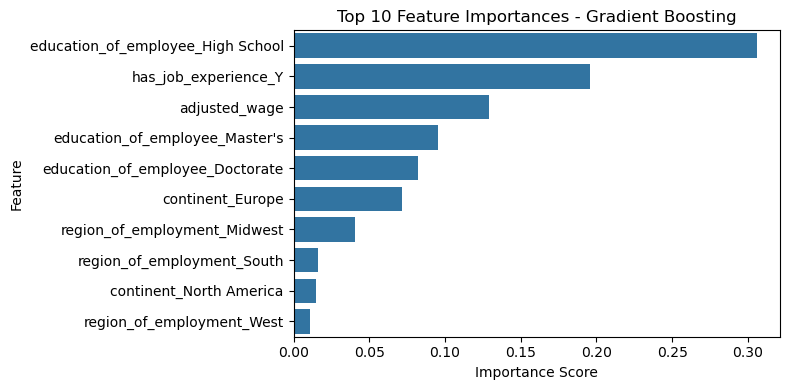

In [229]:
#Feature Importance & Complex Pattern Capture 

#### 🔹 Feature Importance (Gradient Boosting Example)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances
feature_importances = pd.Series(
    grid_gb.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Feature Importance and Boosting Model Insights**

### Interpret Feature Importance and How Boosting Captures Complex Patterns

#### 🔹 Feature Importance (from Gradient Boosting)

The top features influencing visa case approval were:

- **education_of_employee_High School** (most influential)
- **has_job_experience_Y**
- **adjusted_wage**
- **education_of_employee_Master's** and **Doctorate**
- **continent_Europe** and some regional employment zones

This shows that **education level**, **prior experience**, and **offered wage** significantly affect visa approval decisions — consistent with real-world expectations.

#### 🔍 How Boosting Captures Complex Patterns

Boosting models like **AdaBoost** and **Gradient Boosting** learn in a sequential manner:
- Each model focuses on **correcting the errors** of the previous one.
- This allows them to capture **nonlinear relationships**, handle **imbalanced data**, and identify **subtle interactions** between variables.
- Boosting is especially effective when **simple models (weak learners)** struggle to model complex boundaries alone.

### Conclusion:

Boosting not only improves accuracy but also uncovers the most important drivers of visa decisions while adapting to complex, real-world patterns in the data.



**Actionable Insights for Stakeholders**

Based on the full machine learning analysis of visa case approvals, here are three actionable insights for EasyVisa:

1. **Education Strongly Influences Approval**  
   Applicants with higher education levels (especially High School and Master’s) show higher approval likelihood. EasyVisa should prioritize and guide clients toward documenting their academic credentials effectively.

2. **Job Experience and Wage Offer Matter**  
   Candidates with prior job experience and higher prevailing wages had significantly better approval outcomes. Advising employers to offer competitive salaries and emphasizing applicant experience can improve case success rates.

3. **Geographic and Regional Trends Exist**  
   The region of employment (e.g., Midwest vs. South) slightly affects outcomes. EasyVisa could use this insight to suggest optimal job locations or anticipate approval likelihood based on geographic patterns.

These insights enable EasyVisa to improve applicant profiling, employer partnerships, and resource allocation strategies.


<span style="font-size:20px">**Final Model Recommendation and Justification**</span>

### Final Model Selection and Practical Use

#### ✅ Selected Model: **Gradient Boosting Classifier**

### 🔍 Why Gradient Boosting?
Based on all evaluation metrics (Accuracy, Precision, Recall, F1-Score), the **tuned Gradient Boosting model** outperformed others:

| Model                 | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Gradient Boosting (Tuned) | 0.7376   | 0.7664    | 0.8734 | **0.8164** |
| AdaBoost (Tuned)     | 0.7217   | 0.7490    | 0.8775 | 0.8082   |
| Random Forest        | 0.7190   | 0.7676    | 0.8308 | 0.7980   |

- **Highest F1-Score**: Balanced precision and recall
- **Strong Generalization**: Effective even with complex patterns
- **Interpretable**: Feature importance helps guide visa advisory strategies


###  How EasyVisa Can Use This Model:

1. **Approval Probability Prediction**  
   Predict the likelihood of visa approval before submission, improving client confidence and document readiness.

2. **Client Screening & Prioritization**  
   Automatically flag high-potential applicants based on their profile (education, wage, experience).

3. **Employer Advisory**  
   Recommend wage adjustments or preferred regions to improve success rates based on model output.

### ✅ Conclusion:
The Gradient Boosting model is both accurate and business-aligned, making it an ideal decision support tool for EasyVisa to scale smarter, faster, and fairer visa application services.
